In [97]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [98]:
# Load dataset
items = pd.read_csv("../data/processed/items.txt")

In [99]:
# Split data into predictors and target variable
X = items.drop(["sold_quantity"], axis=1)
y = items["sold_quantity"]

In [100]:
# Use seed to ensure reproducibility of experiment
SEED = 7

# Set percentage of dataset for testing and split the data
TEST_SIZE = 0.20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed)

In [104]:
# Fit naive XGBoost model 
naive = XGBRegressor(random_state=seed)
naive.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
# Make predictions for test data
y_pred_naive = naive.predict(X_test)
predictions_naive = [round(value) for value in y_pred]

In [106]:
# Evaluate predictions
mae_naive = mean_absolute_error(y_test, predictions)
mse_naive = mean_squared_error(y_test, predictions)
mape_naive = mean_absolute_percentage_error(y_test, predictions)

In [108]:
# Feature importance
importance_df = pd.DataFrame(index = X.columns, 
                             data=naive.feature_importances_
                            ).reset_index()

importance_df.columns = ["feature", "importance"]

importance_df = importance_df.sort_values("importance", ascending=False)

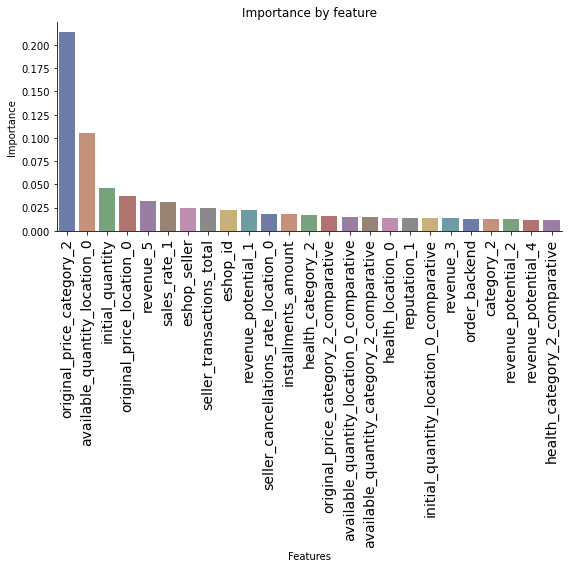

In [109]:
# Visualize importance coefficients for naive XGBoost
chart = sns.catplot(
    data=importance_df.iloc[0:25], kind="bar",
    x="feature", y="importance",
    ci="sd", palette="dark", alpha=.6, height=8
)
chart.set_xticklabels(importance_df.feature.iloc[0:25], 
                      fontsize=14, rotation=90)
chart.set(xlabel ="Features", 
          ylabel = "Importance", 
          title ='Importance by feature')

plt.tight_layout()
plt.savefig('../images/feature_importance_xgboost.png')

![title](../images/feature_importance_xgboost.png)

In [110]:
# In order to improve the error metrics, it is applied a 
# grid search approach for hyperparameter tuning
model = XGBRegressor(random_state=seed)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 320, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring="neg_mean_absolute_error",
)

grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [74]:
# Make predictions for test data
y_pred_grid = grid_search.predict(X_test)

predictions_grid = [round(value) for value in y_pred_grid] 

In [ ]:
# evaluate predictions
mae_grid = mean_absolute_error(y_test, predictions_grid)
mse_grid = mean_squared_error(y_test, predictions_grid)
mape_grid = mean_absolute_percentage_error(y_test, predictions_grid)

In [87]:
# Feature importance grid XGBoost
importance_df_grid = pd.DataFrame(
    index = X.columns, 
    data=grid_search.best_estimator_.feature_importances_
).reset_index()

importance_df_grid.columns = ["feature", "importance"]

importance_df_grid = importance_df_grid.sort_values(
    "importance", ascending=False
)

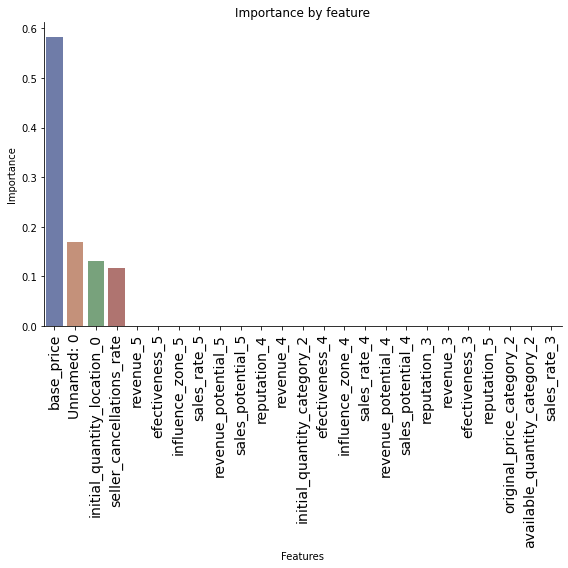

In [95]:
# Visualize importance coefficients for grid XGBoost
chart = sns.catplot(
    data=importance_df_grid.iloc[0:25], kind="bar",
    x="feature", y="importance",
    ci="sd", palette="dark", alpha=.6, height=8
)
chart.set_xticklabels(importance_df_grid.feature.iloc[0:25],
                      fontsize=14, 
                      rotation=90
                     )
chart.set(xlabel ="Features", ylabel = "Importance", title ='Importance by feature')

plt.tight_layout()
plt.savefig('../images/feature_importance_xgboost_grid.png')

![title](../images/feature_importance_xgboost_grid.png)

In [96]:
# Finally, a model performance comparison
compare_errors = pd.DataFrame([
        ["mean_absolute_error", 
         mae_naive, 
         mae_grid],
        ["mean_squared_error", 
         mse_naive, 
         mse_grid],
        ["mean_absolute_percentage_error", 
         mape_naive, 
         mape_grid]
],
    columns = ["metric", "XGBoost_naive", "XGBoost_grid"]
)
compare_errors

,metric,XGBoost_naive,XGBoost_grid
0,mean_absolute_error,1.130285e+03,7.207181e+02
1,mean_squared_error,4.163247e+06,2.834068e+06
2,mean_absolute_percentage_error,1.797359e+17,1.508555e+17


![title](../images/comparacion_de_performance.png)